# Hyper-parameter Tuning

# Definition

Hyper-parameters control the fitting behavior and are not learned from data.

```
estimator.get_params()
```

If you think of your estimator as a black-box, hyper-parameters are knobs on the outside of the box.
The goal of *hyper-parameter tuning* is to set the nobs to get optimal performance.

<img src="img/hp-tuning-two-knobs.jpg">
<div style="text-align: right">Source: Wikipedia</div>

# Why hyper-parameters?

HPs control the fitting behavior thus they "guide" the model search. You can think of this guidance as injecting *bias* into the model. 

<img src="img/eslii-mdl-search.png" style="width:400px;">
<div style="text-align: right">Source: T. Hastie et al. (2017) "Elements of Statistical Learning (Ed. 2)"</div>

# Examples

`sklearn.svm.SVC`
  * C ... complexity, higher C means more variance can be captured.
  * gamma ... width of the RBF kernerl, higher means more smoothness bias.
  
`sklearn.ensemble.RandomForestClassifier`
  * max_depth ... the deeper the trees the more variance we can capture.
  * n_features ... the more de-correlated trees, the more variance reduction (but the more trees needed).
  
`sklearn.linear_model.Ridge`
  * alpha ... penalty on the L2 norm of the model coefficients, higher alpha more bias.

# Hyper-parameter Tuning

*Grid Search* 

    Defacto standard method for tuning hyper-parameters in the past decades.
    
    
*Random Search*

    Explore the hyper-parameter space randomly by drawing samples. 
    Good for high-dimensional spaces (e.g. DNN).
    
    
<img src="img/bergstra12-grid-vs-rand.png" style="width:600px;">
<div style="text-align: right">Source: J. Bergstra and Y. Bengio (2012) "Random Search for Hyper-Parameter Optimization"</div>

# When is Grid Search not a good fit?
<img src="img/hp-tuning-many-knobs.jpg" >
<div style="text-align: right">Source: Wikipedia</div>

# Hyper-parameter Tuning in Scikit-learn

A search consists of:

  * an estimator (regressor or classifier such as `sklearn.svm.SVC()`);
  * a parameter space (e.g. `{'gamma': [0.01, 0.1, 1.0]}`);
  * a method for searching or sampling candidates;
  * a cross-validation scheme; and
  * a score function (e.g. `sklearn.metrics.accuracy_score`).
  
## Classes

  * `GridSearchCV`
  * `RandomizedSearchCV`

In [1]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

data = load_boston()
print("Description\n{}\n{}".format('-' * 10, data.DESCR))
X = data.data
y = data.target
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=.25, random_state=0)

est = SVR()

est.fit(X_train, y_train)

print("model score: %.3f" % mean_absolute_error(y_test, est.predict(X_test)))

Description
----------
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,00

/home/cyned/anaconda3/envs/ucu/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [2]:
est = SVR()

param_grid = [
  {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01], 'kernel': ['rbf']},
 ]

gs = GridSearchCV(est, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
gs.fit(X_train, y_train)

print("best params: {}".format(gs.best_params_))
print("model score: %.3f" % mean_absolute_error(y_test, gs.predict(X_test)))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
model score: 3.047


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.3s finished
/home/cyned/anaconda3/envs/ucu/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [3]:
import scipy

est = SVR()

param_grid = {
    'C': scipy.stats.expon(scale=100), 
    'gamma': scipy.stats.expon(scale=.1), 
    'kernel': ['rbf', 'linear']
}

gs = RandomizedSearchCV(est, param_grid, cv=3, scoring='neg_mean_absolute_error', 
                        n_iter=12, verbose=1, random_state=0)
gs.fit(X_train, y_train)

print("best params: {}".format(gs.best_params_))
print("model score: %.3f" % mean_absolute_error(y_test, gs.predict(X_test)))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best params: {'C': 49.88720138545616, 'gamma': 0.18083692319941533, 'kernel': 'rbf'}
model score: 2.946


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.6s finished


Populating the interactive namespace from numpy and matplotlib


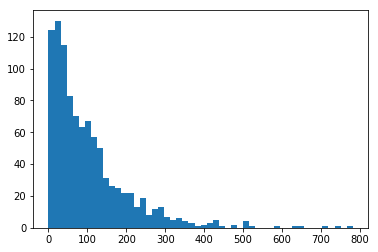

In [4]:
%pylab inline

import scipy
dist = scipy.stats.expon(scale=100)
_ = plt.hist(dist.rvs(1000), 50)

# Tuning Shortcuts

### Fit-once-evaluate-many

Some models allow us to evaluate many hyper-parameter settings in a single fit. 
Examples: n_estimators in `RandomForest` and `GradientBoosting`; "regularization path" in linear models.
    
### Warm-starts

Some models converge faster when warm started from a previous solution (with different HP settings). See [warm_start](https://scikit-learn.org/stable/glossary.html#term-warm-start) in sklearn.
    
### Heuristics

For some hyper-parameters, good values or ranges can be compute via heuristics.
Example: `gamma='auto'` in RBF kernel. 
    
### Sub-sampling

For some hyper-parameters, we can probe for good values on a subset of the data. Be cautious though!
Example: `learning_rate` in SGD.